In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

keys = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y']
norm_keys = keys[1:]

In [2]:
alexa_scores = [36.0, 33.9, 35.1, 33.9, 33.2, 33.7, 32.6, 31.2, 31.2]
facebook_scores = [42.6, 38.5, 37.0, 36.6, 36.1, 36.5, 35.0, 37.0, 33.0]

alexa_scores_norm = [x/alexa_scores[0] for x in alexa_scores][1:]
facebook_scores_norm = [x/facebook_scores[0] for x in facebook_scores][1:]

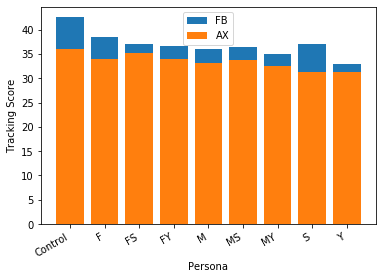

In [3]:
__, ax = plt.subplots()

plt.bar(np.arange(len(facebook_scores)), facebook_scores, label = 'FB')
plt.bar(np.arange(len(alexa_scores)), alexa_scores, label = 'AX')
plt.xticks(np.arange(len(alexa_scores)), keys)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('Persona')
plt.ylabel('Tracking Score')
plt.legend()
plt.show()

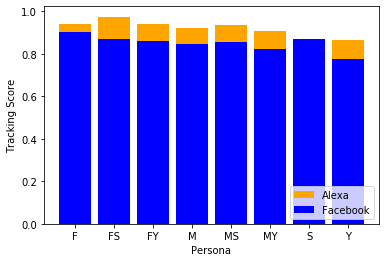

In [4]:
plt.bar(np.arange(len(alexa_scores_norm)), alexa_scores_norm, label = 'Alexa', color='orange')
plt.bar(np.arange(len(facebook_scores_norm)), facebook_scores_norm, label = 'Facebook', color='blue')
plt.xticks(np.arange(len(alexa_scores_norm)), norm_keys)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('Persona')
plt.ylabel('Tracking Score')
plt.legend(loc='lower right')
plt.show()

# REPEAT WITH COOKIES (NOT SCORE)

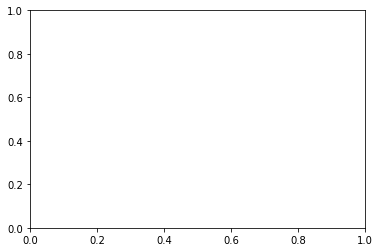

In [5]:
alexa_scores = [27.7, 27.2, 27.2, 27.2, 26.6, 25.8, 26.4, 25.7, 21.9]
facebook_scores = [22.1, 28.2, 28.2, 28.7, 27.8, 27.3, 27.4, 29.0, 18.7]

alexa_scores_norm = [x/alexa_scores[0] for x in alexa_scores][1:]
facebook_scores_norm = [x/facebook_scores[0] for x in facebook_scores][1:]

fig, ax = plt.subplots()

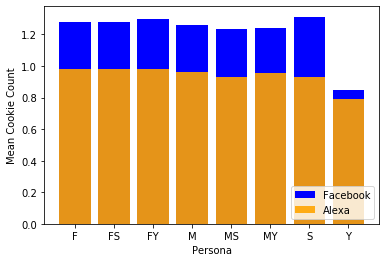

In [22]:
plt.bar(np.arange(len(facebook_scores_norm)), facebook_scores_norm, label = 'Facebook', color='blue')
plt.bar(np.arange(len(alexa_scores_norm)), alexa_scores_norm, label = 'Alexa', color='orange', alpha=0.9)
plt.xticks(np.arange(len(alexa_scores_norm)), norm_keys)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('Persona')
plt.ylabel('Mean Cookie Count')
plt.legend(loc='lower right')
plt.show()

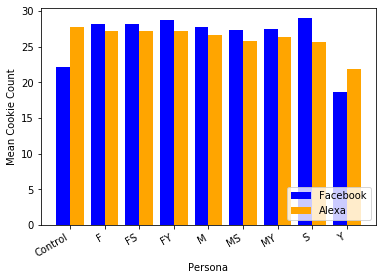

In [34]:
figX, ax = plt.subplots()
x_axis = np.arange(len(keys))

plt.bar(x_axis - 0.2, facebook_scores, label = 'Facebook', color='blue', width=0.4)
plt.bar(x_axis + 0.2, alexa_scores, label = 'Alexa', color='orange', width=0.4)

plt.xticks(np.arange(len(alexa_scores)), keys)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('Persona')
plt.ylabel('Mean Cookie Count')
plt.legend(loc='lower right')
plt.show()

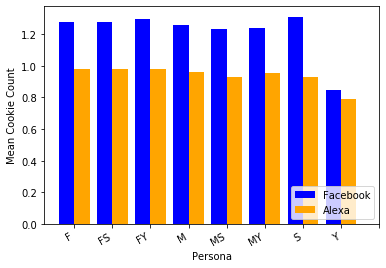

In [35]:
figY, ax = plt.subplots()
x_axis = np.arange(len(norm_keys))

plt.bar(x_axis - 0.2, facebook_scores_norm, label = 'Facebook', color='blue', width=0.4)
plt.bar(x_axis + 0.2, alexa_scores_norm, label = 'Alexa', color='orange', width=0.4)

plt.xticks(np.arange(len(alexa_scores)), norm_keys)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('Persona')
plt.ylabel('Mean Cookie Count')
plt.legend(loc='lower right')
plt.show()

In [36]:
figX.savefig('PersonaTracking2.eps', format='eps')
figY.savefig('PersonaTrackingNorm2.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Box and Whisker Plots

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x_path = "D:\Project_Working"

A_paths  = ['\AlexaControl_crawl-data', '\AlexaF_crawl-data', '\AlexaFS_crawl-data', '\AlexaFY_crawl-data', 
            '\AlexaM_crawl-data', '\AlexaMS_crawl-data', '\AlexaMY_crawl-data', '\AlexaS_crawl-data', '\AlexaY_crawl-data']
F_paths  = ['\FacebookControl_crawl-data', '\FacebookF_crawl-data', '\FacebookFS_crawl-data', '\FacebookFY_crawl-data', 
            '\FacebookM_crawl-data', '\FacebookMS_crawl-data', '\FacebookMY_crawl-data', '\FacebookS_crawl-data', '\FacebookY_crawl-data']

for i in range(len(A_paths)):
    A_paths[i] = x_path + A_paths[i] + '.sqlite'
    F_paths[i] = x_path + F_paths[i] + '.sqlite'

A_Cp, A_Fp, A_FSp, A_FYp, A_Mp, A_MSp, A_MYp, A_Sp, A_Yp  = A_paths

F_Cp, F_Fp, F_FSp, F_FYp, F_Mp, F_MSp, F_MYp, F_Sp, F_Yp  = F_paths

print(A_Yp)


D:\Project_Working\AlexaY_crawl-data.sqlite


In [10]:
def get_cookies_table(db_name):
    con = sqlite3.connect(db_name)
    cur = con.cursor()

    cur.execute('SELECT * FROM javascript_cookies')
    javascript_cookies = cur.fetchall()
    names = [description[0] for description in cur.description]
    javascript_cookies.sort(key=lambda x: x[0]) #Sort by id
    js_cookies = pd.DataFrame(javascript_cookies, columns=names)

    cur.execute('SELECT * FROM site_visits')
    site_visits = cur.fetchall()
    names = [description[0] for description in cur.description]
    site_visits.sort(key=lambda x: x[3]) #Sort by id
    site_visits = pd.DataFrame(site_visits, columns=names)
    site_ranks = site_visits.drop(columns=['visit_id', 'browser_id'])

    #Cookie counts per site, descending order
    df_x = site_visits.copy()
    df_y = js_cookies.copy()
    df_z = pd.merge(df_x, df_y, on=['visit_id', 'browser_id'])

    series_cookies = df_z.groupby(['site_url'])['host'].count().sort_values(ascending=False)

    for site in site_visits['site_url']: #Fill in sites that placed no cookies
        if site not in series_cookies.keys():
            series_cookies = series_cookies.set_value(site, 0)
    series_cookies = series_cookies.rename('cookies')

    df_cookies = pd.merge(df_x, series_cookies, on='site_url')
    df_cookies.set_index('site_rank')
    
    con.close()
    del [[js_cookies,site_ranks,df_x,df_y,df_z]]
    
    return df_cookies

In [11]:
A_Cdb = get_cookies_table(A_Cp)
A_Fdb = get_cookies_table(A_Fp)
A_FSdb = get_cookies_table(A_FSp)
A_FYdb = get_cookies_table(A_FYp)
A_Mdb = get_cookies_table(A_Mp)
A_MSdb = get_cookies_table(A_MSp)
A_MYdb = get_cookies_table(A_MYp)
A_Sdb = get_cookies_table(A_Sp)
A_Ydb = get_cookies_table(A_Yp)

F_Cdb = get_cookies_table(F_Cp)
F_Fdb = get_cookies_table(F_Fp)
F_FSdb = get_cookies_table(F_FSp)
F_FYdb = get_cookies_table(F_FYp)
F_Mdb = get_cookies_table(F_Mp)
F_MSdb = get_cookies_table(F_MSp)
F_MYdb = get_cookies_table(F_MYp)
F_Sdb = get_cookies_table(F_Sp)
F_Ydb = get_cookies_table(F_Yp)

C:\Users\Zee\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [22]:
Alexa_DBs = [A_Cdb['cookies'], A_Fdb['cookies'], A_FSdb['cookies'], A_FYdb['cookies'], A_Mdb['cookies'], A_MSdb['cookies'], 
             A_MYdb['cookies'], A_Sdb['cookies'], A_Ydb['cookies']]

Facebook_DBs = [F_Cdb['cookies'], F_Fdb['cookies'], F_FSdb['cookies'], F_FYdb['cookies'], F_Mdb['cookies'], F_MSdb['cookies'], 
                F_MYdb['cookies'], F_Sdb['cookies'], F_Ydb['cookies']]

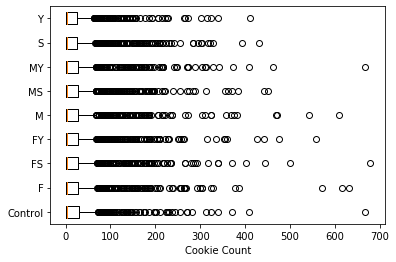

In [31]:
fig1, ax = plt.subplots()
plt.boxplot(Alexa_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'])
plt.xlabel('Cookie Count')
plt.show()

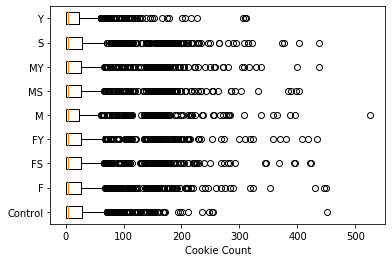

In [32]:
fig2, ax = plt.subplots()
plt.boxplot(Facebook_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'])
plt.xlabel('Cookie Count')
plt.show()

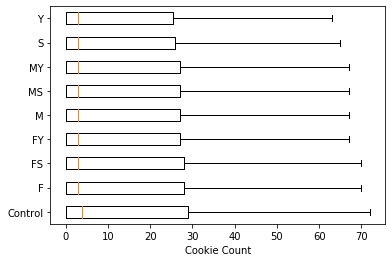

In [33]:
fig3, ax = plt.subplots()
plt.boxplot(Alexa_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'], showfliers=False)
plt.xlabel('Cookie Count')
plt.show()

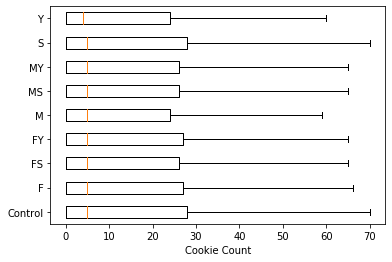

In [34]:
fig4, ax = plt.subplots()
plt.boxplot(Facebook_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'], showfliers=False)
plt.xlabel('Cookie Count')
plt.show()

In [35]:
fig1.savefig('AlexaOutliersBoxplot.eps', format='eps')
fig2.savefig('FacebookOutliersBoxplot.eps', format='eps')
fig3.savefig('AlexaBoxplot.eps', format='eps')
fig4.savefig('FacebookBoxplot.eps', format='eps')

# Unique Parties Box Plots

In [2]:
def get_parties_table(db_name):
    con = sqlite3.connect(db_name)
    cur = con.cursor()

    cur.execute('SELECT * FROM javascript_cookies')
    javascript_cookies = cur.fetchall()
    names = [description[0] for description in cur.description]
    javascript_cookies.sort(key=lambda x: x[0]) #Sort by id
    js_cookies = pd.DataFrame(javascript_cookies, columns=names)

    cur.execute('SELECT * FROM site_visits')
    site_visits = cur.fetchall()
    names = [description[0] for description in cur.description]
    site_visits.sort(key=lambda x: x[3]) #Sort by id
    site_visits = pd.DataFrame(site_visits, columns=names)
    site_ranks = site_visits.drop(columns=['visit_id', 'browser_id'])

    #Cookie counts per site, descending order
    df_x = site_visits.copy()
    df_y = js_cookies.copy()
    df_z = pd.merge(df_x, df_y, on=['visit_id', 'browser_id'])

    #Sites sorted by unique third parties present
    series_unique1 = df_z.groupby('site_url').host.nunique().sort_values(ascending=False)
    series_unique1 = series_unique1.rename('unique_third_parties')

    df_unique1 = pd.merge(site_visits, series_unique1, on='site_url')
    df_unique1.set_index('site_rank')
    
    con.close()
    del [[js_cookies,site_ranks,df_x,df_y,df_z]]
    
    return df_unique1

In [3]:
A_Cdb = get_parties_table(A_Cp)
A_Fdb = get_parties_table(A_Fp)
A_FSdb = get_parties_table(A_FSp)
A_FYdb = get_parties_table(A_FYp)
A_Mdb = get_parties_table(A_Mp)
A_MSdb = get_parties_table(A_MSp)
A_MYdb = get_parties_table(A_MYp)
A_Sdb = get_parties_table(A_Sp)
A_Ydb = get_parties_table(A_Yp)

F_Cdb = get_parties_table(F_Cp)
F_Fdb = get_parties_table(F_Fp)
F_FSdb = get_parties_table(F_FSp)
F_FYdb = get_parties_table(F_FYp)
F_Mdb = get_parties_table(F_Mp)
F_MSdb = get_parties_table(F_MSp)
F_MYdb = get_parties_table(F_MYp)
F_Sdb = get_parties_table(F_Sp)
F_Ydb = get_parties_table(F_Yp)

In [7]:
Alexa_DBs = [A_Cdb['unique_third_parties'], A_Fdb['unique_third_parties'], A_FSdb['unique_third_parties'], 
             A_FYdb['unique_third_parties'], A_Mdb['unique_third_parties'], A_MSdb['unique_third_parties'], 
             A_MYdb['unique_third_parties'], A_Sdb['unique_third_parties'], A_Ydb['unique_third_parties']]

Facebook_DBs = [F_Cdb['unique_third_parties'], F_Fdb['unique_third_parties'], F_FSdb['unique_third_parties'], 
                F_FYdb['unique_third_parties'], F_Mdb['unique_third_parties'], F_MSdb['unique_third_parties'], 
                F_MYdb['unique_third_parties'], F_Sdb['unique_third_parties'], F_Ydb['unique_third_parties']]

C:\Users\Zee\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


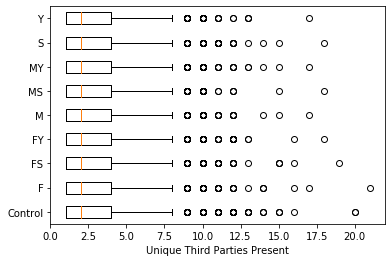

In [12]:
fig1, ax = plt.subplots()
plt.boxplot(Alexa_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'])
plt.xlabel('Unique Third Parties Present')
plt.show()

C:\Users\Zee\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


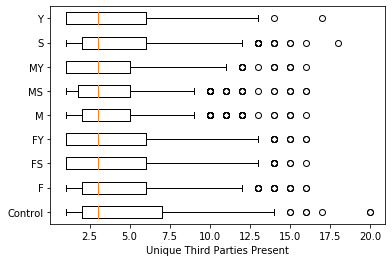

In [13]:
fig2, ax = plt.subplots()
plt.boxplot(Facebook_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'])
plt.xlabel('Unique Third Parties Present')
plt.show()

C:\Users\Zee\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


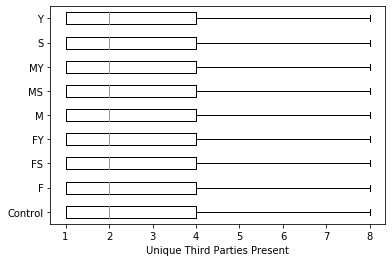

In [14]:
fig3, ax = plt.subplots()
plt.boxplot(Alexa_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'], showfliers=False)
plt.xlabel('Unique Third Parties Present')
plt.show()

C:\Users\Zee\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


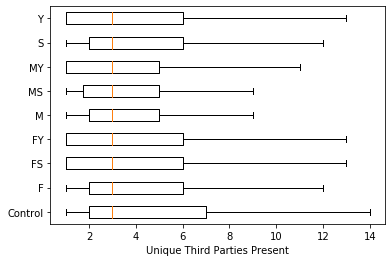

In [15]:
fig4, ax = plt.subplots()
plt.boxplot(Facebook_DBs, vert=False, labels = ['Control', 'F', 'FS', 'FY', 'M', 'MS', 'MY', 'S', 'Y'], showfliers=False)
plt.xlabel('Unique Third Parties Present')
plt.show()

In [35]:
fig1.savefig('AlexaOutliersBoxplot.eps', format='eps')
fig2.savefig('FacebookOutliersBoxplot.eps', format='eps')
fig3.savefig('AlexaBoxplot.eps', format='eps')
fig4.savefig('FacebookBoxplot.eps', format='eps')